In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Transformed_Housing_Data2.csv')

In [2]:
def param_init(Y):
    '''Y = target variable
    returns initialised values of m and c'''
    m=0.1
    c = Y.mean()
    return m,c 

In [3]:
def generate_predictions(m, c, X):
    '''X = independent variable
    returns predictions generated by the line with parameters m and c'''
    prediction = []
    for x in X:
        pred = m * x + c
        prediction.append(pred)
    return prediction

In [4]:
def compute_cost(prediction, Y):
    '''returns mean squared error between prediction and Y'''
    cost=np.sum(((prediction - Y)**2)/len(Y))
    return cost

In [5]:
def gradients(prediction, Y, X):
    '''returns gradients corresponding to m and c'''
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y)* X)
    Gc = 2/n * np.sum(prediction - Y)
    return Gm, Gc

In [6]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    '''update and return new values of m and c'''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new

In [13]:
def result(m, c, X, Y, cost, predictions, i):
  '''
  Print and plot the final result obtained from gradient descent
  '''
  ##If the Gradient Descent converged to the optimum value before max_iter
  if i < max_iter - 1 :
    print("***** Gradient Descent has converged at iteration {} *****".format(i))
  else:
    print("***** Result after", max_iter,'iterations is: *****')
  
  ## plotting the final result
  plt.figure(figsize = (14,7), dpi = 120)
  plt.scatter(X, Y, color = 'red', label = 'data points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color = 'green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()

In [8]:
sale_price=data['Sale_Price'].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680
5,1129575,5420
6,257500,1715
7,291850,1060
8,229500,1780
9,323000,1890


After Iteration 0: m = 3499072.307222223, c = 465999.44299999997, cost = 64177937552.075005
After Iteration 20: m = 7.115927055971628e+105, c = 2.997778392048355e+102, cost = 2.7417231010181384e+208
After Iteration 40: m = 1.447154337383132e+205, c = 6.096532424296826e+201, cost = inf
After Iteration 60: m = 2.9430538842431367e+304, c = 1.2398417341018387e+301, cost = inf
After Iteration 80: m = nan, c = nan, cost = nan
After Iteration 100: m = nan, c = nan, cost = nan
After Iteration 120: m = nan, c = nan, cost = nan
After Iteration 140: m = nan, c = nan, cost = nan
After Iteration 160: m = nan, c = nan, cost = nan
After Iteration 180: m = nan, c = nan, cost = nan
After Iteration 200: m = nan, c = nan, cost = nan
After Iteration 220: m = nan, c = nan, cost = nan
After Iteration 240: m = nan, c = nan, cost = nan
After Iteration 260: m = nan, c = nan, cost = nan
After Iteration 280: m = nan, c = nan, cost = nan
After Iteration 300: m = nan, c = nan, cost = nan
After Iteration 320: m = n

C:\Users\HP\AppData\Local\Temp\ipykernel_14408\1628450431.py:3: RuntimeWarning: overflow encountered in square
  cost=np.sum(((prediction - Y)**2)/len(Y))
C:\Users\HP\AppData\Local\Temp\ipykernel_14408\3437811763.py:4: RuntimeWarning: overflow encountered in multiply
  Gm = 2/n * np.sum((prediction - Y)* X)
C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_14408\3660590475.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  m_new = m_old - alpha * Gm_old
C:\Users\HP\AppData\Local\Temp\ipykernel_14408\3660590475.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  c_new = c_old - alpha * Gc_old


After Iteration 800: m = nan, c = nan, cost = nan
After Iteration 820: m = nan, c = nan, cost = nan
After Iteration 840: m = nan, c = nan, cost = nan
After Iteration 860: m = nan, c = nan, cost = nan
After Iteration 880: m = nan, c = nan, cost = nan
After Iteration 900: m = nan, c = nan, cost = nan
After Iteration 920: m = nan, c = nan, cost = nan
After Iteration 940: m = nan, c = nan, cost = nan
After Iteration 960: m = nan, c = nan, cost = nan
After Iteration 980: m = nan, c = nan, cost = nan
******Result after 1000 iterations is : ******


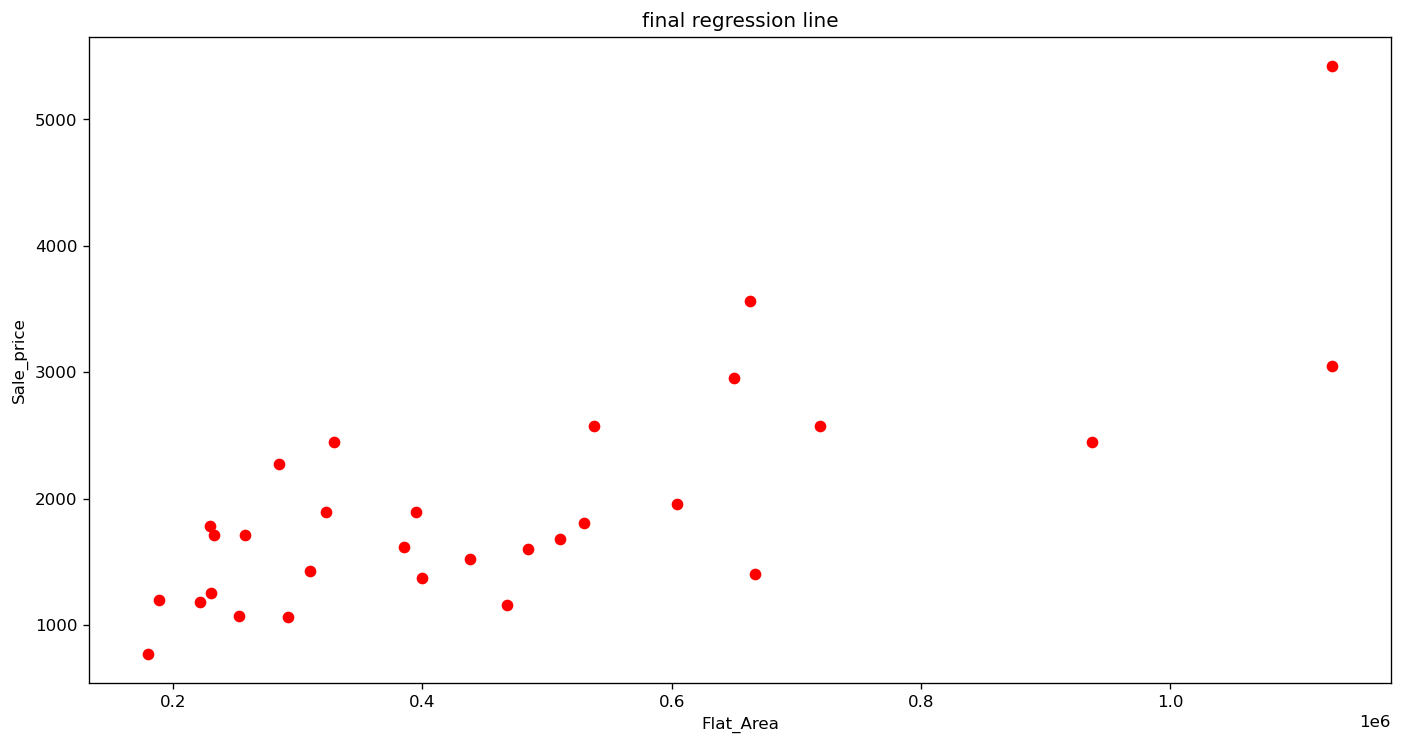

In [9]:
#defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

#declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

# step 1 : initialising the values of m and c
m, c = param_init(sale_price)

# gradient descent in action:
for i in range(0, max_iter):
    #step 2: generating predictions:
    predictions = generate_predictions(m , c, flat_area)
    
    #step 3: calculating the cost
    cost_new = compute_cost(predictions, sale_price)
    
    #calculating gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    #step 4: updating m and c
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    #display result after every 20 iterations:
    if i%20 == 0 :
        print(f"After Iteration {i}: m = {m}, c = {c}, cost = {cost_new}")
        
    #updating cost_old to keep track whether gradient descent has converged or not
    cost_old = cost_new
    
#final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)

In [ ]:
#This is not the desired output as m and c values are very high...because values in the dataset are high
#Hence, we need to scale our data 

After Iteration 0: m = 0.11316346413633305, c = 1.1849780416165836e-16, cost = 0.85836535863667
After Iteration 20: m = 0.3275595607435688, c = 1.240489192847842e-16, cost = 0.6182472245590185
After Iteration 40: m = 0.4706921039517346, c = 1.3248661427193537e-16, cost = 0.5112264752046607
After Iteration 60: m = 0.5662485308150865, c = 1.415904430738617e-16, cost = 0.46352728398628984
After Iteration 80: m = 0.6300427631414932, c = 1.4951003398285442e-16, cost = 0.4422677351921283
After Iteration 100: m = 0.6726323011945988, c = 1.611303683072644e-16, cost = 0.4327923457067555
After Iteration 120: m = 0.7010654163122192, c = 1.666074685620818e-16, cost = 0.42856916078553225
After Iteration 140: m = 0.7200475906265729, c = 1.6660746856208182e-16, cost = 0.4266868855601835
After Iteration 160: m = 0.7327202415200801, c = 1.669405354694694e-16, cost = 0.42584795473189874
After Iteration 180: m = 0.7411806042798547, c = 1.6694053546946945e-16, cost = 0.42547404292284524
After Iteration 20

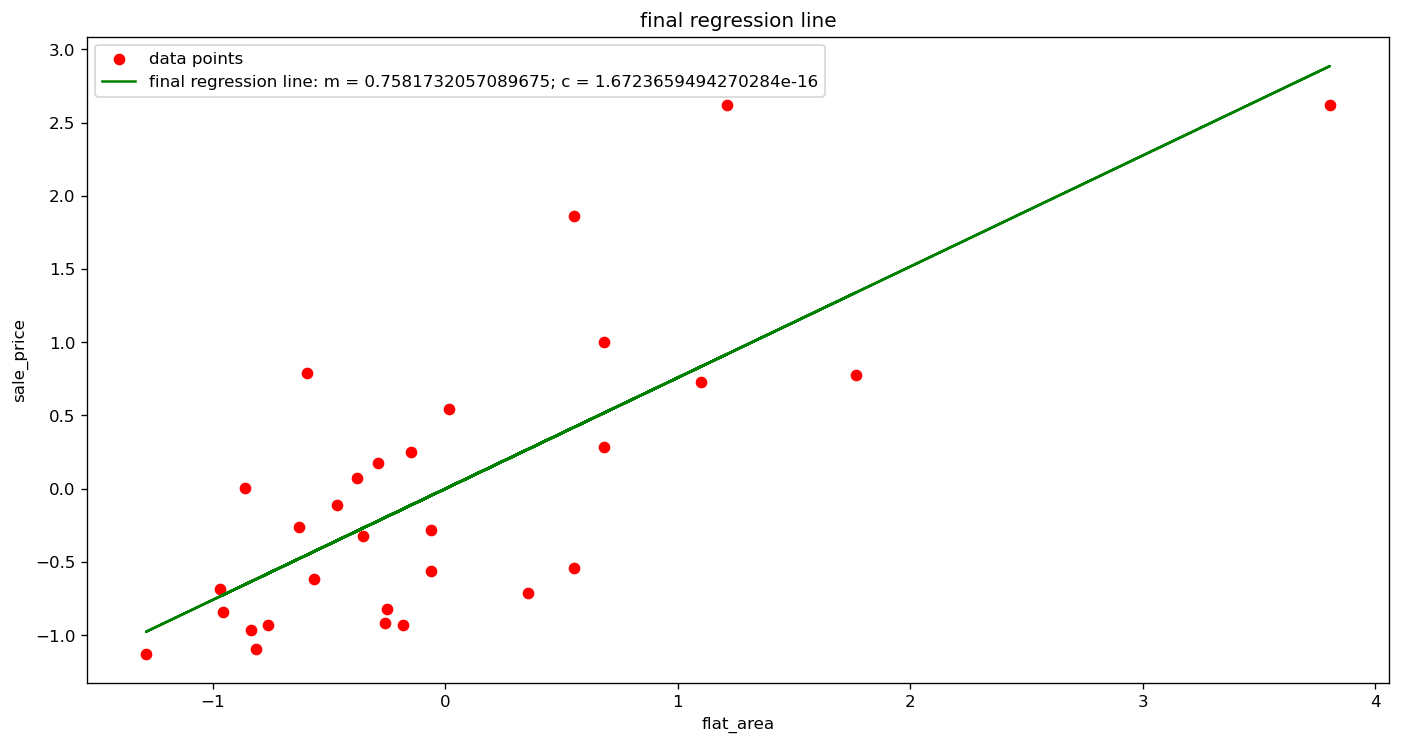

In [14]:
## scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))


#declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

# step 1 : initialising the values of m and c :

m, c = param_init(sale_price)

# gradient descent in action:
for i in range(0, max_iter):
    #step 2: generating predictions:
    predictions = generate_predictions(m , c, flat_area)
    
    #step 3: calculating the cost
    cost_new = compute_cost(predictions, sale_price)
    
    #calculating gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    #step 4: updating m and c
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    #display result after every 20 iterations:
    if i%20 == 0 :
        print(f"After Iteration {i}: m = {m}, c = {c}, cost = {cost_new}")
        
    #updating cost_old to keep track whether gradient descent has converged or not
    cost_old = cost_new
    
#final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)

In [ ]:
data = read_csv("Raw Housing Data.csv")
data.info()
data.describe 
plt.scatter(x= data['Sale Price'], y=data['id'],axis = 1 )
plt.title("Sale price vs id ")
def param_init(Y):
    '''Y = target variable
    returns initialised values of m and c'''
    m=0.1
    c = Y.mean()
    return m,c 
    
def generate_predictions(m, c, X):
    '''X = independent variable
    returns predictions generated by the line with parameters m and c'''
    prediction = []
    for x in X:
        pred = m * x + c
        prediction.append(pred)
    return prediction 

Y= target variable 
returns initialised values of m and c
x= independent variable 
returns predictions generated by the line with parameters m and c 
prediction = []
m= 0.2 
c=y.mean()
return m m,c